# 2024.09.03 화요일 공부 내용(최승원-56대대) - 488p ~  508p

In [23]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.8/792.8 kB 131.5 MB/s eta 0:00:00


### 문장 토큰화

In [2]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt_tab')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
You can see it out your window or on your television. \
You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)

print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data]   Package punkt_tab is already up-to-date!


### 단어 토큰화

In [3]:
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [4]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
    # 문장 별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


### 스톱 워드 제거(큰 의미 없는 단어)

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
print('영어 stop words 개수: ', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수:  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [7]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 분장멸로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        # 소문자로 모두 변환합니다.
        word = word.lower()
        # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)

    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming과 Lemmatization(단어의 원형을 찾아주는 기술)

In [8]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [9]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fanciest', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


### 희소 행렬 - COO 형식

In [10]:
import numpy as np

dense = np.array([[3,0,1], [0,2,0]])

In [11]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [12]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### 희소 행렬 - CSR 형식

In [13]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


# 2024.09.03 화요일 공부 내용(최승원-56대대) - 509p

## 텍스트 분류 실습 - 20 뉴스그룹 분류

In [14]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state=156)

In [15]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [16]:
import pandas as pd

print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
Name: count, dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [17]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

In [1]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target

# subset='test'으로 테스트 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data), len(test_news.data)))

학습 데이터 크기 11314, 테스트 데이터 크기 7532


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
# Count Vectorization으로 피처 백터화 변환 수행
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit() 된 CountVectorizer를 이용해 테스트 데이터를 피처 벡터화 변환 수행
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 텍스트의 CountVectorizer Shape: ', X_train_cnt_vect.shape)
print('테스트 데이터 텍스트의 CountVectorizer Shape: ', X_test_cnt_vect.shape)

학습 데이터 텍스트의 CountVectorizer Shape:  (11314, 101631)
테스트 데이터 텍스트의 CountVectorizer Shape:  (7532, 101631)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# LogisticRegression을 이용하여 학습/예측/평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# TF-IDF 벡터화를 적용해 학습 데이터 세트와 테스트 데이터 세트 변환
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)
print(X_test_tfidf_vect.shape)
# LogisticRegression을 이용해 학습/예측/평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

(7532, 101631)
TF-IDF Logistic Regression의 예측 정확도는 0.678


In [6]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경해 피처 백터화 적용
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)
print(X_test_tfidf_vect.shape)
# LogisticRegression을 이용해 학습/예측/평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

(7532, 943453)
TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.690


In [22]:
from sklearn.model_selection import GridSearchCV
print(X_test_tfidf_vect.shape)
# 최적 C 값 도출 튜닝 수행. CV는 3 폴드 세트로 설정
params = {'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf, param_grid=params, cv=3, scoring='accuracy' ,verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter: ', grid_cv_lr.best_params_)
# 최적 C 값으로 학습된 grid_cv로 예측 및 정확도 평가
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

(7532, 943453)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter:  {'C': 10}
TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.704


In [23]:
pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_word='english')),
                     ('lr_clf', LogisticRegression(random_state=156))])

NameError: name 'Pipeline' is not defined

In [ ]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect로, LogisticRegression 객체를 lr_clf로 생성하는 Pipeline 생성
pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df = 300)),
                     ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

# 별도의 TfidfVectorizer 객체의 fit(), transform()과 LogisticRegression의 fir(), predict()가 필요없음
# pipeline의 fit()과 predict()만으로 한꺼번에 피처 벡터화와 ML 학습/예측이 가능
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english')),
                     ('lr_clf', LogisticRegression())
                    ])
# Pipeline에 기술된 각각의 객체 변수에 언더바(_) 2개를 연달아 붙여 GridSearchCV에 사용될 파라미터/하이퍼 파라미터 이름과 값을 설정
params = {'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
          'tfidf_vect__max_df': [100, 300, 700],
          'lr_clf__C':[1,5,10]
         }
# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)
print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

pred=grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

# 2024.09.07 토요일 공부 내용(최승원-56대대) - 519p ~ 534p

## 감성 분석(Sentiment Analysis)

### 지도학습 기반 감성 분석 실습 - IMDB 영화평

In [ ]:
import pandas as pd

review_df = pd.read_csv('labeledTrainData.tsv', header=0, sep='\t', quoting=3)
review_df.head(3), review_df.shape

In [ ]:
print(review_df['review'][0])

In [ ]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", "", x))

In [ ]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
print(class_df.shape)
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False)
print(feature_df.shape)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization 수행
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred), roc_auc_score(y_test, pred_probs)))

In [ ]:
# 스톱워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])

pipeline.fit(X_train['review'],y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]
print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred), roc_auc_score(y_test, pred_probs)))

### 비지도학습 기반 감성 분석 소개

In [ ]:
import nltk
nltk.download('all')

In [ ]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성
synsets = wn.synsets(term)
print('synsets() 반환 type: ', type(synsets))
print('synsets() 반환 값 개수: ', len(synsets))
print('synsets() 반환 값: ', synsets)

In [ ]:
for synset in synsets:
    print('##### Synset name: ', synset.name(), '#####')
    print('POS: ', synset.lexname())
    print('Definition: ', synset.definition())
    print('Lemmas: ', synset.lemma_names())

In [ ]:
# synset 객체를 단어별로 생성합니다.
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정합니다.
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity), 2)
                  for compared_entity in entities]
    similarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장합니다.
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 Type: ', type(senti_synsets))
print('senti_synsets() 반환 값 개수: ', len(senti_synsets))
print('senti_synsets() 반환 값: ', senti_synsets)


In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')

print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ', fabulous.pos_score())
print('fabulous 부정감성 지수: ', fabulous.neg_score())
print('fabulous 객관성 지수: ', fabulous.obj_score())

In [ ]:
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0

    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            # wordNet 기반 품사 태깅 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue

            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1

    if not tokens_count:
        return 0

    # 총 score가 0 이상일 경우 긍정 1, 그렇지 않을 경우 부정 0 반환
    if sentiment >=0:
        return 1
    return 0


In [ ]:
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print('정확도: ', np.round(accuracy_score(y_target, preds), 4))
print('정밀도: ', np.round(precision_score(y_target, preds), 4))
print('재현율: ', np.round(recall_score(y_target, preds), 4))

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

In [ ]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)

    # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x : vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print('정확도: ', np.round(accuracy_score(y_target, vader_preds), 4))
print('정밀도: ', np.round(precision_score(y_target, vader_preds), 4))
print('재현율: ', np.round(recall_score(y_target, vader_preds), 4))

# 2024.09.10 화요일 공부 내용(최승원-56대대) - 534p ~ 549p

## 토픽 모델링(Topic Modeling) - 20 뉴스그룹

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터 사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개의 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. featch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape: ', feat_vect.shape)

In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

In [ ]:
print(lda.components_.shape)
lda.components_

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을때, 그 값의 array 인덱스를 반환
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        # top_indexes대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

## 문서 군집화 소개와 실습(Opinion Review 데이터 세트)

In [7]:
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 700)
path = './topics'

all_files = glob.glob(os.path.join(path, '*.data'))
filename_list = []
opinion_text = []
print(all_files)
for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    
    filename_ = file_.split('/')[-1]
    print(filename_)
    filename = filename_.split('.')[0]
    
    filename_list.append(filename)
    opinion_text.append(df.to_string())
print(filename_list)
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

document_df.head()

['./topics/display_garmin_nuvi_255W_gps.txt.data', './topics/screen_garmin_nuvi_255W_gps.txt.data', './topics/interior_honda_accord_2008.txt.data', './topics/comfort_toyota_camry_2007.txt.data', './topics/directions_garmin_nuvi_255W_gps.txt.data', './topics/eyesight-issues_amazon_kindle.txt.data', './topics/features_windows7.txt.data', './topics/satellite_garmin_nuvi_255W_gps.txt.data', './topics/free_bestwestern_hotel_sfo.txt.data', './topics/quality_toyota_camry_2007.txt.data', './topics/bathroom_bestwestern_hotel_sfo.txt.data', './topics/parking_bestwestern_hotel_sfo.txt.data', './topics/food_swissotel_chicago.txt.data', './topics/fonts_amazon_kindle.txt.data', './topics/size_asus_netbook_1005ha.txt.data', './topics/keyboard_netbook_1005ha.txt.data', './topics/food_holiday_inn_london.txt.data', './topics/seats_honda_accord_2008.txt.data', './topics/voice_garmin_nuvi_255W_gps.txt.data', './topics/screen_netbook_1005ha.txt.data', './topics/sound_ipod_nano_8gb.txt.data', './topics/serv

,filename,opinion_text
0,display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ..."
1,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the screen it works great !\n0 and zoom out buttons on the 255w to the same side of the screen which makes it a bit easier .\n1 ...
2,interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...
3,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ..."
4,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...


In [24]:

from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환. 
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환. 
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfdif_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfdif_vect.fit_transform(document_df['opinion_text'])

In [10]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [11]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",3
1,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the screen it works great !\n0 and zoom out buttons on the 255w to the same side of the screen which makes it a bit easier .\n1 ...,3
2,interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,2
3,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",2
4,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,3


In [12]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
16,food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,1
12,food_swissotel_chicago,The food for our event was delicious .\n0 ...,1
8,free_bestwestern_hotel_sfo,The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n0 They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n1 ...,1
40,location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0 Great Location , Nice Rooms , Helpless Concierge\n1 ...",1
11,parking_bestwestern_hotel_sfo,Parking was expensive but I think this is common for San Fran .\n0 there is a fee for parking but well worth it seeing no where to park if you do have a car .\n1 ...,1
32,service_bestwestern_hotel_sfo,"Both of us having worked in tourism for over 14 years were very disappointed at the level of service provided by this gentleman .\n0 The service was good, very friendly staff and we loved the free wine reception each night .\n1 ...",1
23,service_holiday_inn_london,"not customer, oriented hotelvery low service levelboor reception\n0 The room was quiet, clean, the bed and pillows were comfortable, and the serv...",1
21,service_swissotel_hotel_chicago,Mediocre room and service for a very extravagant price .\n0 ...,1
46,staff_bestwestern_hotel_sfo,Staff are friendl...,1
29,staff_swissotel_chicago,"The staff at Swissotel were not particularly nice .\n0 Each time I waited at the counter for staff for several minutes and then was waved to the desk upon my turn with no hello or anything, or apology for waiting in line .\n1 ...",1


In [13]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
39,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",2
3,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",2
44,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,2
2,interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,2
31,interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",2
25,mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",2
43,performance_honda_accord_2008,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",2
9,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 I bought the Camry because of Toyota reliability and qua...,2
17,seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",2
30,transmission_toyota_camry_2007,"After slowing down, transmission has to be kicked to speed up .\n0 ...",2


In [14]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
38,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",3
41,buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",3
4,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,3
0,display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",3
5,eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",3
6,features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",3
13,fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",3
27,navigation_amazon_kindle,"In fact, the entire navigation structure has been completely revised , I'm still getting used to it but it's a huge step forward .\n0 ...",3
24,price_amazon_kindle,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 lower overall price, with nice leather cover .\n1 ...",3
7,satellite_garmin_nuvi_255W_gps,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you've passed the street, frequently loses the satellite signal, or has old maps missing streets, you know how important this stuff is .\n1 ...",3


In [15]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
10,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",4
45,location_holiday_inn_london,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",4
22,price_holiday_inn_london,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",4
47,room_holiday_inn_london,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...",4
48,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , H...",4
34,rooms_swissotel_chicago,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ...",4


In [16]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
25,mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",0
30,transmission_toyota_camry_2007,"After slowing down, transmission has to be kicked to speed up .\n0 ...",0
2,interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,0
3,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",0
44,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,0
9,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 I bought the Camry because of Toyota reliability and qua...,0
39,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",0
43,performance_honda_accord_2008,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",0
17,seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",0
31,interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",0


In [17]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape: ', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape:  (3, 4610)
[[0.         0.00092552 0.         ... 0.         0.         0.        ]
 [0.         0.00099548 0.00174656 ... 0.         0.00183397 0.00144581]
 [0.0100545  0.         0.         ... 0.00706288 0.         0.        ]]


In [18]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [19]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [24]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['02 22', '07059', '0369 815', '00000ee5', '01001001', '01001001 db', '0b6er', '000 psi', '0444 obfuscate', '052 555']
Reviews 파일명 : ['interior_honda_accord_2008', 'comfort_toyota_camry_2007', 'quality_toyota_camry_2007', 'seats_honda_accord_2008', 'mileage_honda_accord_2008', 'transmission_toyota_camry_2007', 'interior_toyota_camry_2007']
####### Cluster 1
Top features: ['0646 information', '01111111b 10111111', '0739 12', '0881', '01 pgh', '02va7pu oe9slnx', '000 392', '000 way', '05 93', '041 128']
Reviews 파일명 : ['free_bestwestern_hotel_sfo', 'bathroom_bestwestern_hotel_sfo', 'parking_bestwestern_hotel_sfo', 'food_swissotel_chicago', 'food_holiday_inn_london', 'service_swissotel_hotel_chicago', 'price_holiday_inn_london']
####### Cluster 2
Top features: ['07 91', '000 442', '02 telephone', '000 558', '0245', '02 zr', '00101011b', '0d fij', '08 copyright', '0d pwu8']
Reviews 파일명 : ['display_garmin_nuvi_255W_gps', 'screen_garmin_nuvi_255W_gps', 'directi

# 2024.09.16 월요일 공부 내용(최승원-56대대) - 550p ~ 583p

## 문서 유사도

In [2]:
# 두개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1,v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)
print(feature_vect_simple)

(3, 18)
  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (1, 16)	0.39624495215024286
  (1, 7)	0.39624495215024286
  (1, 12)	0.39624495215024286
  (1, 10)	0.3013544995034864
  (1, 8)	0.2340286519091622
  (1, 15)	0.2340286519091622
  (1, 14)	0.2340286519091622
  (1, 17)	0.4680573038183244
  (1, 6)	0.2340286519091622
  (2, 3)	0.3098560092999078
  (2, 4)	0.3098560092999078
  (2, 9)	0.3098560092999078
  (2, 1)	0.3098560092999078
  (2, 5)	0.3098560092999078
  (2, 11)	0.3098560092999078
  (2, 10)	0.23565348175165166
  (2, 8)	0.1830059506093466
  (2, 15)	0.3660119012186932
  (2, 14)	0.1830059506093466
  (2, 17)	0.3660119012186932
  (2, 6)	0.1830059506093466


In [4]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장1, 문장2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장2 Cosine 유사도: 0.402


In [14]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장1, 문장3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장2, 문장3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장3 Cosine 유사도: 0.404
문장2, 문장3 Cosine 유사도: 0.456


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [16]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape: ', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape:  (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [36]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...


True

In [57]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = './topics'
all_files = glob.glob(os.path.join(path, '*.data'))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
print(document_df)
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters = 3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

                           filename  \
0      display_garmin_nuvi_255W_gps   
1       screen_garmin_nuvi_255W_gps   
2        interior_honda_accord_2008   
3         comfort_toyota_camry_2007   
4   directions_garmin_nuvi_255W_gps   
5     eyesight-issues_amazon_kindle   
6                 features_windows7   
7    satellite_garmin_nuvi_255W_gps   
8        free_bestwestern_hotel_sfo   
9         quality_toyota_camry_2007   
10   bathroom_bestwestern_hotel_sfo   
11    parking_bestwestern_hotel_sfo   
12           food_swissotel_chicago   
13              fonts_amazon_kindle   
14         size_asus_netbook_1005ha   
15          keyboard_netbook_1005ha   
16          food_holiday_inn_london   
17          seats_honda_accord_2008   
18       voice_garmin_nuvi_255W_gps   
19            screen_netbook_1005ha   
20              sound_ipod_nano_8gb   
21  service_swissotel_hotel_chicago   
22         price_holiday_inn_london   
23       service_holiday_inn_london   
24              price_ama

/opt/conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔러 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==0].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, '와 타 문서 유사도 #####')

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Index([2, 3, 9, 17, 25, 30, 31, 39, 43, 44], dtype='int64')
##### 비교 기준 문서명  interior_honda_accord_2008 와 타 문서 유사도 #####
[[1.         0.29416005 0.17919747 0.20212677 0.04304539 0.039204
  0.92892524 0.33045744 0.16230653 0.05448838]]


가장 유사도가 큰 파일명 및 유사도: 
 filename      interior_toyota_camry_2007
similarity                      0.928925
Name: 31, dtype: object


Text(0.5, 1.0, 'interior_honda_accord_2008')

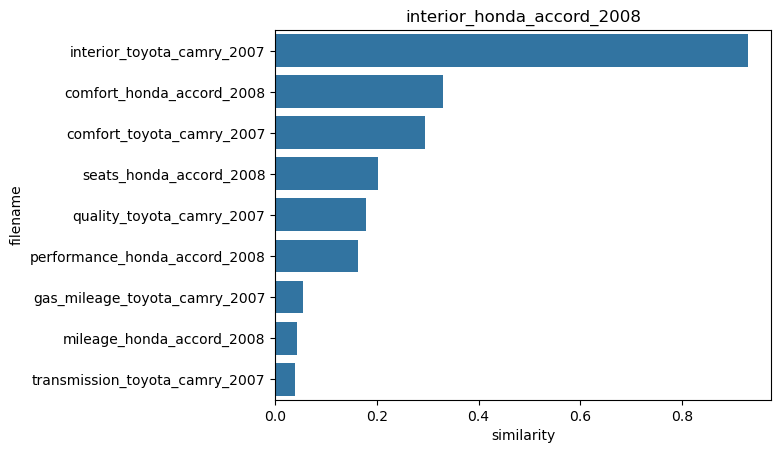

In [59]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기자신은 제외.
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도: \n', hotel_1_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

## 558p부터 583p는 책으로 대체